## Librerías

In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Extracción y exploración básica de los datos

In [4]:
df = pd.read_excel('IMM_2020.xls', sheet_name='IMM_2020')
df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


En el archivo README del repositorio de GitHub se encuentra el diccionario de variables.

In [5]:
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


In [6]:
df.describe(include = object)

,NOM_ENT,NOM_MUN,GM_2020
count,2469,2469,2469
unique,32,2328,5
top,Oaxaca,Benito Juárez,Muy bajo
freq,570,7,655


In [44]:
gradoMarginacion = df.groupby('GM_2020').size()
estadosMasfrecuenteGradMarg = df.groupby('GM_2020')['NOM_ENT'].apply(lambda x: x.value_counts().idxmax())
pd.DataFrame({'Número de municipios': gradoMarginacion, 'Estado más frecuente': estadosMasfrecuenteGradMarg})

,Número de municipios,Estado más frecuente
GM_2020,,
Alto,586,Oaxaca
Bajo,530,Oaxaca
Medio,494,Oaxaca
Muy alto,204,Oaxaca
Muy bajo,655,Jalisco


In [12]:
df.info()
print("Número de variables con valores perdidos: " + str(len(df.columns[df.isna().any()])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB
Número de variables con valores perdidos: 0


De las estadísticas desplegadas podemos observar varias cosas interesantes.

Con respecto a la estructura de los datos, vemos que tenemos 2469 registros con 17 variables, 11 con valores reales, 3 con enteros y 3 con texto, donde no hay datos perdidos. 

Vemos que México cuenta con 2469 municipios repartidos por 32 entidades federativas. Siendo Oaxaca el estado con más municipios con 570 en total. Otro dato interesante es que 2328 nombres están repartidos entre los 2459 municipios, esto es casi el 6% de los municipios repiten nombre, siendo Benito Juárez el nombre más común con 7 municipios. De los datos preocupantes, el grado de marginación (GM_2020) que más frecuente es "Muy bajo" con 655 municipios en este grado.  En estado de Jalisco es donde se encuentran la mayoría de estos municipios y en el de Oaxaca es donde se encuentras la mayoría de los municipios con un "Alto" y "Muy alto" grado de marginación. Siguiendo con el índice de marginación (IM_2020),  el 50% de los municipios tienen un IM mayor a 54, cin máximo de 62.39 y mínimo de 21.4.


## Gráfica interesantes

In [219]:
orderColumnas = ['Muy alto', 'Alto', 'Medio', 'Bajo', 'Muy bajo']

# Creamos dataframe con el porcentaje de municipios por estado con 
# índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto".
totalMunicipioPorEstadoPorGM = df.groupby('NOM_ENT')['GM_2020'].size()
porcentGMporEstado = (df.groupby('NOM_ENT')['GM_2020']
                .apply(lambda x: x.value_counts()/totalMunicipioPorEstadoPorGM[x.name]*100) 
                .unstack()
              )
porcentGMporEstado = porcentGMporEstado.reindex(columns = orderColumnas)           
porcentGMporEstado.head(20)

,Muy alto,Alto,Medio,Bajo,Muy bajo
NOM_ENT,,,,,
Aguascalientes,NaN,NaN,NaN,NaN,100.000000
Baja California,NaN,NaN,16.666667,NaN,83.333333
Baja California Sur,NaN,NaN,NaN,NaN,100.000000
Campeche,NaN,16.666667,16.666667,50.000000,16.666667
Chiapas,16.129032,53.225806,24.193548,5.645161,0.806452
Chihuahua,16.417910,2.985075,5.970149,28.358209,46.268657
Ciudad de México,NaN,NaN,NaN,NaN,100.000000
Coahuila de Zaragoza,NaN,NaN,NaN,21.052632,78.947368
Colima,NaN,NaN,NaN,20.000000,80.000000


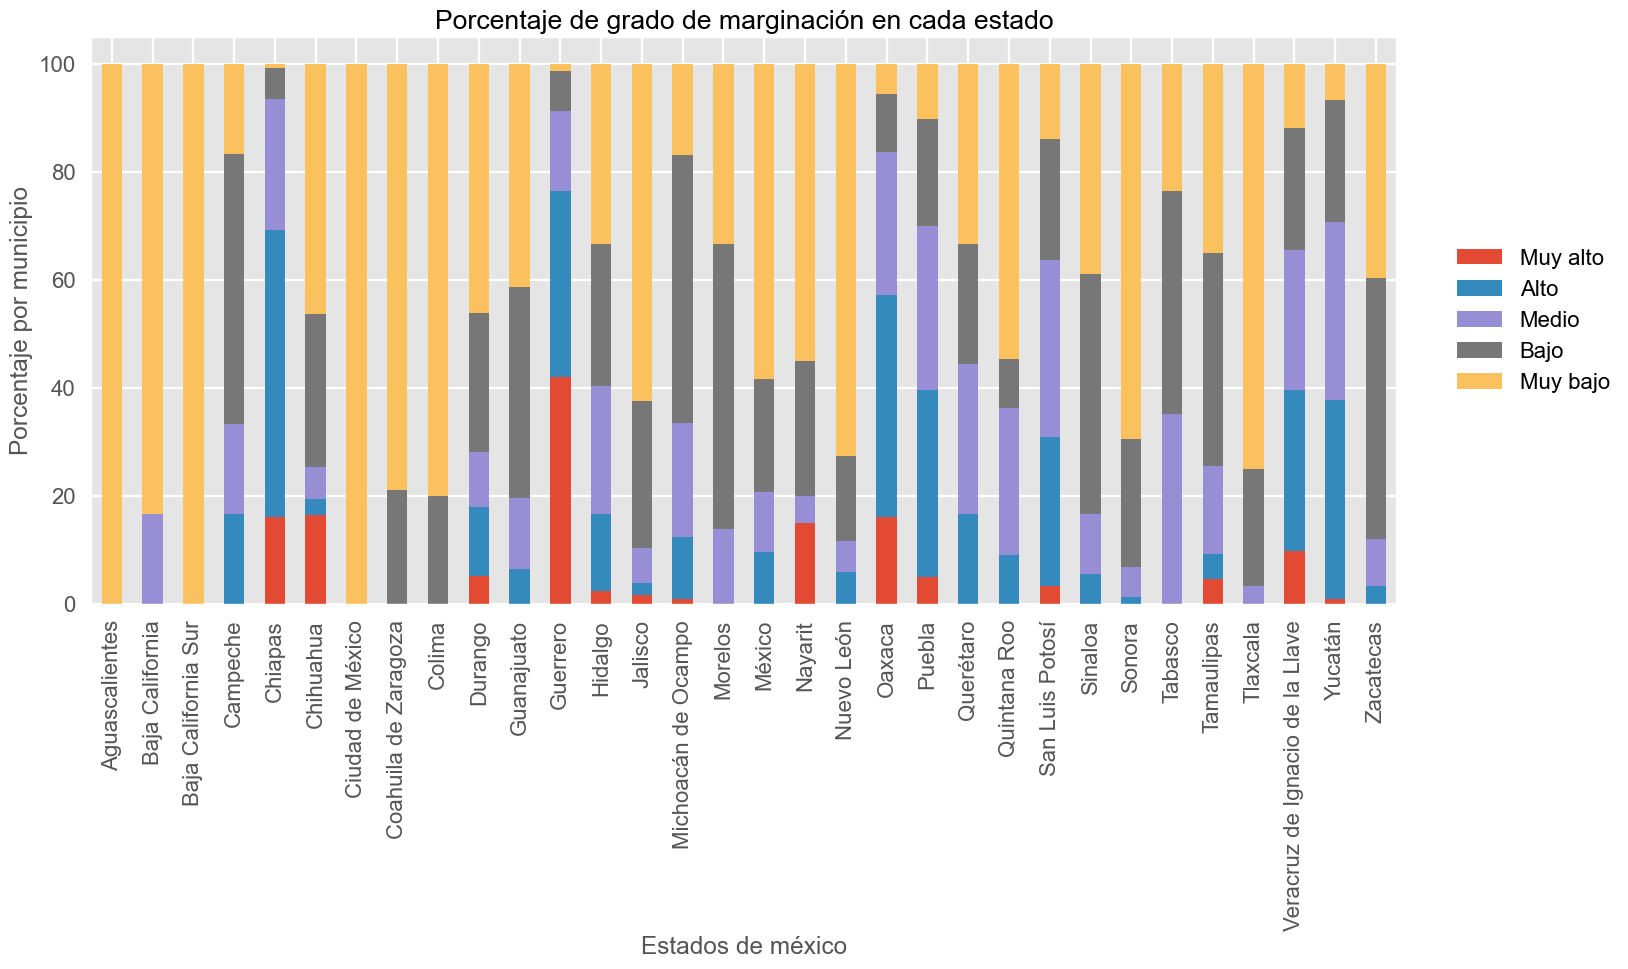

In [215]:
with plt.style.context(('seaborn-poster')): # Estilo de la grafica

    # Creamos grafica de barras
    ax = porcentGMporEstado.plot(kind='bar', figsize=(15,7), stacked=True)

    # Etiquetas
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0) # Movemos las legendas afuera del plot
    plt.xlabel('Estados de méxico')
    plt.ylabel('Porcentaje por municipio')
    plt.title('Porcentaje de grado de marginación en cada estado')

    # Guardamos
    plt.savefig('porcentGMporEstado.png', bbox_inches='tight')

    # Mostamos 
    plt.show()

In [216]:
# Creamos dataFrame con el porcentaje de la población, respecto a la población 
# total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", 
# "alto" y "muy alto". 
PobPorEstado = df.groupby('NOM_ENT')['POB_TOT'].sum()
porcentGMporPobPorEstado = (df.groupby(['NOM_ENT', 'GM_2020'])['POB_TOT']
                              .apply(lambda x: x.sum()/PobPorEstado[x.name[0]]*100)
                              .unstack()                       
                            )
porcentGMporPobPorEstado = porcentGMporPobPorEstado.reindex(columns = orderColumnas)
porcentGMporPobPorEstado.head()

GM_2020,Muy alto,Alto,Medio,Bajo,Muy bajo
NOM_ENT,,,,,
Aguascalientes,NaN,NaN,NaN,NaN,100.000000
Baja California,NaN,NaN,3.119325,NaN,96.880675
Baja California Sur,NaN,NaN,NaN,NaN,100.000000
Campeche,NaN,8.469424,5.474475,27.574451,58.481650
Chiapas,18.821255,31.036894,21.239187,18.005014,10.897651


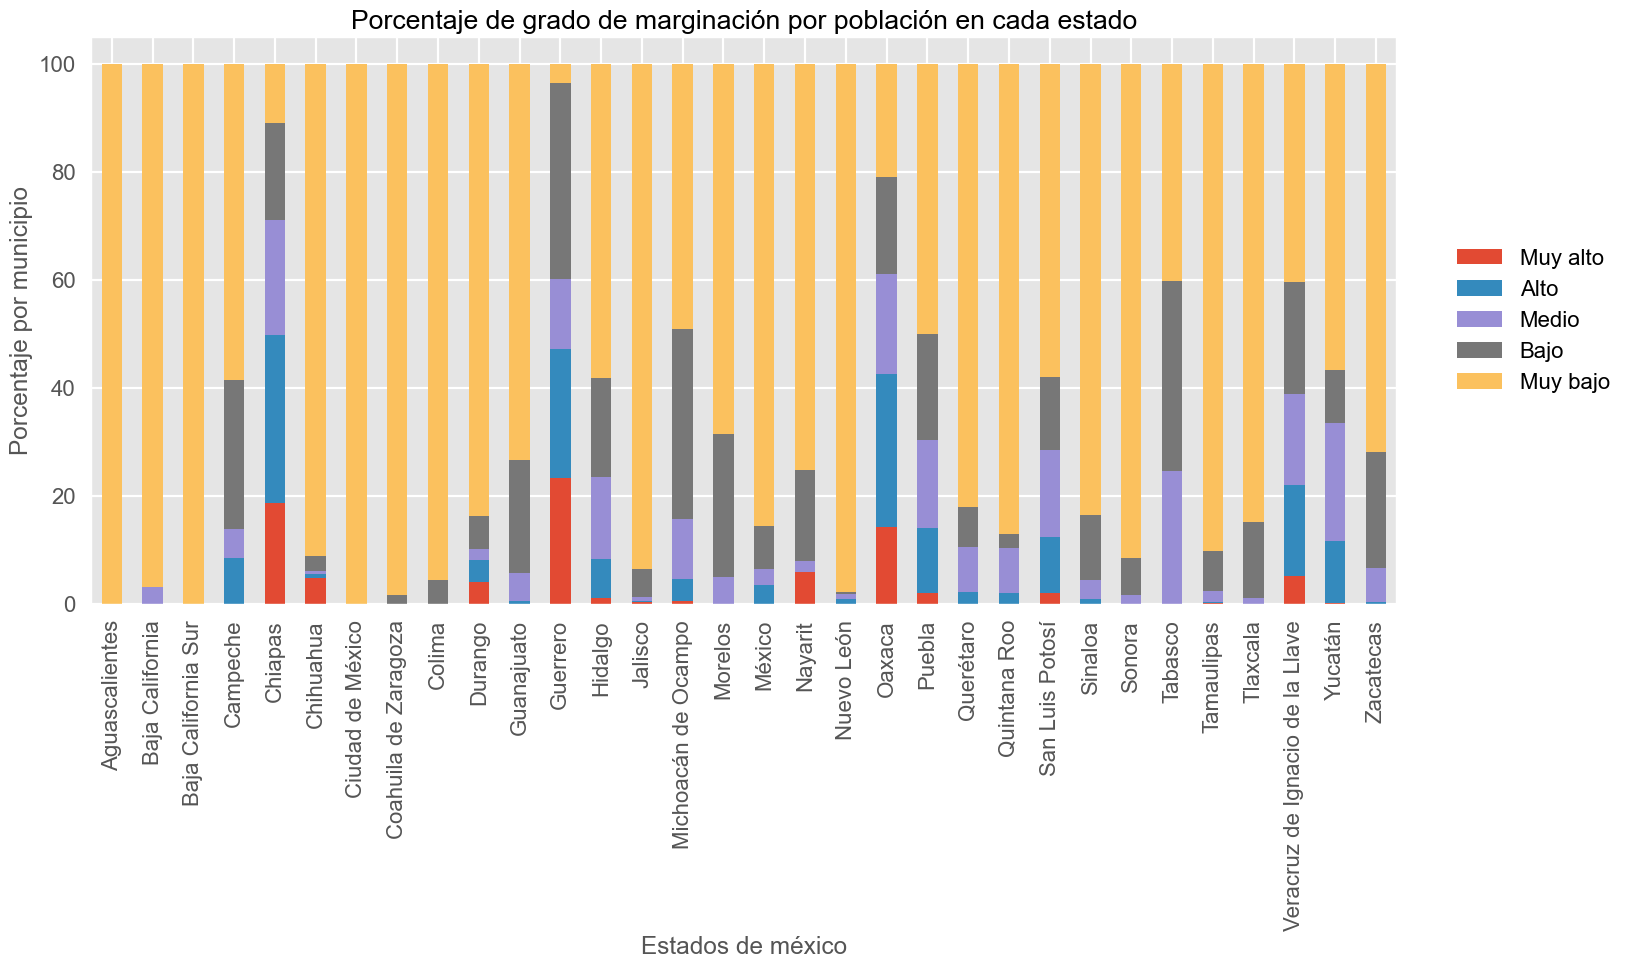

In [218]:
with plt.style.context(('seaborn-poster')): # Estilo de la grafica
    
    # Creamos grafica de barras
    ax = porcentGMporPobPorEstado.plot(kind='bar', figsize=(15,7), stacked=True)

    # Etiquetas
    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0) # Movemos las legendas afuera del plot
    plt.xlabel('Estados de méxico')
    plt.ylabel('Porcentaje por municipio')
    plt.title('Porcentaje de grado de marginación por población en cada estado')

    # Guardamos 
    plt.savefig('porcentGMporPobPorEstado.jpg', bbox_inches='tight')

    # Mostamos
    plt.show()

Si comparamos las graficas vemos que hay un cambio significante en los porcentajes. Cuando calculamos el porcentaje de personas en cada grado de migración vemos como el grado “Muy bajo” aumenta considerablemente, bajando principalmente los grados de “Bajo” y “Medio”. Esto quiere indicar que los municipios con un nivel ‘’Muy bajo’’ de marginación son los más poblados.

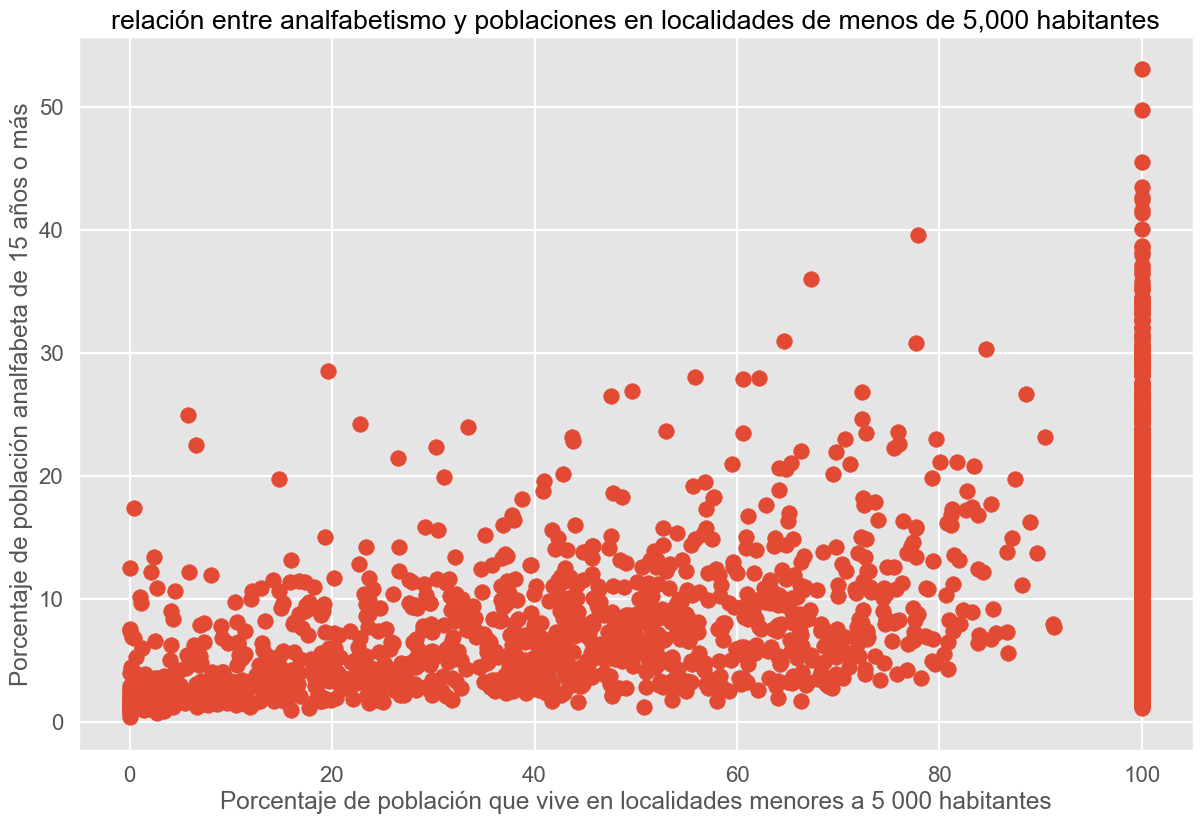

In [247]:
with plt.style.context(('seaborn-poster')): # Estilo de la grafica
    
    # Creamos grafica
    plt.scatter(df.loc[:, 'PL.5000'], df.loc[:, 'ANALF'])

    # Etiquetas
    plt.xlabel('Porcentaje de población que vive en localidades menores a 5 000 habitantes')
    plt.ylabel('Porcentaje de población analfabeta de 15 años o más')
    plt.title('relación entre analfabetismo y poblaciones en localidades de menos de 5,000 habitantes')

    # Mostamos
    plt.show()

Parece ser que están correlacionadas, entre más porcentaje de población que vive en localidades menores a 5 mil habitantes la tendencia de analfabetismo en personas de 15 años o más aumenta. Sin embargo, esto es cuando PL.5000 es menos al 90 por ciento, si hablamos del 100 por ciento vemos como la tendencia se rompe, por lo tanto no pienso que sea concluyente.

Un análisis que se pude realizar es calcular la correlación entre la columna “ANALF” y las columnas numéricas del dataFrame, exceptuando las columnas “CVE_ENT” y “CVE_MUN” ya que son las claves de los estados y municipios respectivamente, además de graficar las relaciones.

In [285]:
# Seleccionamos las columnas a comparar
columnasAcomparar = df.select_dtypes(include='float64').columns
columnasAcomparar = columnasAcomparar.append(pd.Index(['POB_TOT']))

# Calculamos las correlacion
correlacion = df[columnasAcomparar].corr()['ANALF']
print(correlacion)

ANALF       1.000000
SBASC       0.779053
OVSDE       0.347537
OVSEE       0.351523
OVSAE       0.360644
OVPT        0.644960
VHAC        0.658532
PL.5000     0.449324
PO2SM       0.620011
IM_2020    -0.847822
IMN_2020   -0.847822
POB_TOT    -0.236801
Name: ANALF, dtype: float64


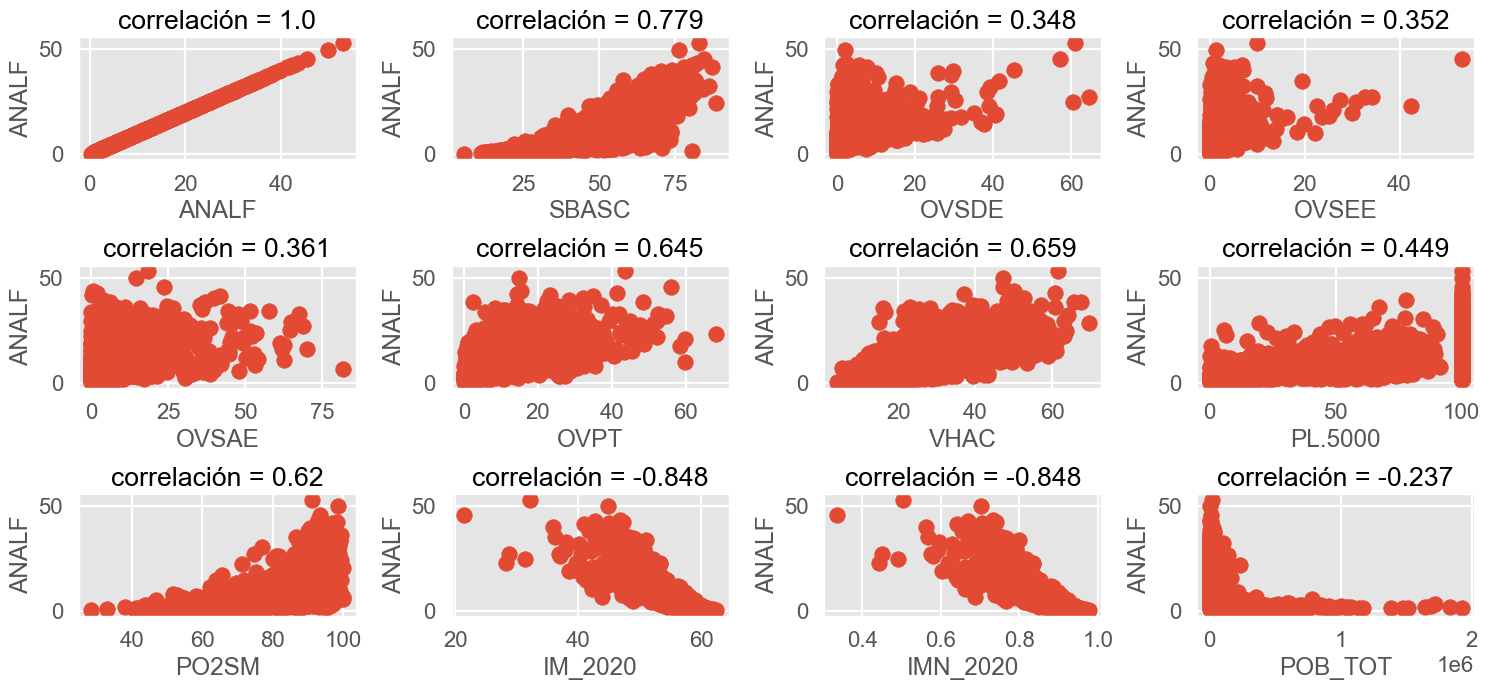

In [286]:
with plt.style.context(('seaborn-poster')): # Estilo de la grafica

    # Creamos subplots
    fig, axes = plt.subplots(3, 4, figsize=(15, 7))

    # Flatten axes array to handle different subplot configurations
    axes = axes.flatten()

    # Creamos graficas discretas
    for punto, columna in enumerate(columnasAcomparar):
        ax = axes[punto]
        ax.scatter(df[columna], df['ANALF'])
        ax.set_xlabel(columna)
        ax.set_ylabel('ANALF')
        ax.set_title(f'correlación = {round(correlacion[punto],3)}')

    # Evitamos que se sobrelapen las graficas
    fig.tight_layout()

    # Mostramos
    plt.show()

En la gráfica podemos ver que el porcentaje de población de 15 años o más sin educación básica (SBASC) y los índices de marginación, sin (IM_2020) y con normalización (IMN_2020), son los más correlacionados con el porcentaje de población analfabeta de 15 años o más. Donde “SBASC” tiene una correlación positiva de 0.779, IM_2020 y IMN_2020 una negativa de -0.848. Era de esperarse que estas últimas dos tuvieran la misma correlación, ya que solo las diferencia un factor de normalización. Por último, la correlación con “PL.5000” es baja, sugiriendo, otra vez, que no hay correlación. 